# Purpose of the Guide
IIIF is a powerful and flexible way to serve, explore, manipulate, and improve images. 
This guide outlines several ways you can use the Library of Congress IIIF API to manipulate images from Library of Congress collections. 

# What is IIIF?
From their website:
> The International Image Interoperability Framework (IIIF) is a set of shared application programming interface (API) specifications for interoperable functionality in digital image repositories. The IIIF is comprised of and driven by a community of libraries, museums, archives, software companies, and other organizations working together to create, test, refine, implement and promote the IIIF specifications. Using JSON-LD, linked data, and standard W3C web protocols such as Web Annotation, IIIF makes it easy to parse and share digital image data, migrate across technology systems, and provide enhanced image access for scholars and researchers. In short, IIIF enables better, faster and cheaper image delivery. It lets you leverage interoperability and the fabric of the Web to access new possibilities and new users for your image-based resources, while reducing long term maintenance and technological lock in. IIIF gives users a rich set of baseline functionality for viewing, zooming, and assembling the best mix of resources and tools to view, compare, manipulate and work with images on the Web, an experience made portable–shareable, citable, and embeddable.

Or in other terms, it is a standard way to get an image using a API.

# What the different parts of the URL mean?
The url that you request to get a image has several parts that determine what and how the image is returned. Here is a brief overview of the various parts. To learn more in-depth please see http://iiif.io/api/image/2.1/

`{scheme}://{server}{/prefix}/{identifier}/{region}/{size}/{rotation}/{quality}.{format}`
* scheme - Indicates the use of the HTTP or HTTPS protocol in calling the service.
* server - The host server on which the service resides. The parameter may also include a port number.
* prefix - The path on the host server to the service. This prefix is optional, but may be useful when the host server supports multiple services. The prefix may contain multiple path segments, delimited by slashes, but all other special characters must be encoded. See URI Encoding and Decoding for more information.
* identifier - The identifier of the requested image. This may be an ark, URN, filename, or other identifier. Special characters must be URI encoded.
* region - The region parameter defines the rectangular portion of the full image to be returned. Region can be specified by pixel coordinates, percentage or by the value “full”, which specifies that the entire image should be returned.
* size - The size parameter determines the dimensions to which the extracted region is to be scaled.
* rotation - The rotation parameter specifies mirroring and rotation. A leading exclamation mark (“!”) indicates that the image should be mirrored by reflection on the vertical axis before any rotation is applied. The numerical value represents the number of degrees of clockwise rotation, and may be any floating point number from 0 to 360.
* quality - The quality parameter determines whether the image is delivered in color, grayscale or black and white.
* format - The format of the returned image is expressed as an extension at the end of the URI.

In [3]:
import requests
from IPython.display import Image, display

# What is supported?
You can directly query the server to find out what is supported for a give image. What is returned is a json response with various details, like the different formats that you can have the image generated in, the quality of the image generated, and other various actions it can take on the image like rotation or mirroring. 

Here is an example of the request, which will give us the JSON response about a specific image in the Library's collection:

In [9]:
r = requests.get("http://tile.loc.gov/image-services/iiif/service:sgp:sgpbatches:batch_dlc_anacostia_ver01:data:sn84025948:0023728866A:1942081001:0202/info.json")
r.json()

{'@context': 'http://iiif.io/api/image/2/context.json',
 '@id': 'https://tile.loc.gov/image-services/iiif/service:sgp:sgpbatches:batch_dlc_anacostia_ver01:data:sn84025948:0023728866A:1942081001:0202',
 'height': 4663,
 'profile': ['http://iiif.io/api/image/2/level2.json',
  {'formats': ['jpg', 'jp2', 'tif', 'pdf', 'gif', 'png', 'webp'],
   'qualities': ['default', 'native', 'color', 'gray', 'bitonal'],
   'supports': ['baseUriRedirect',
    'cors',
    'jsonldMediaType',
    'mirroring',
    'regionByPct',
    'regionByPx',
    'rotationBy90s',
    'sizeByWhListed',
    'sizeByForcedWh',
    'sizeByH',
    'sizeByPct',
    'sizeByW',
    'sizeByWh']}],
 'protocol': 'http://iiif.io/api/image',
 'tiles': [{'scaleFactors': [1, 2, 4, 8, 16, 32, 64], 'width': 512}],
 'width': 3156}

# How do I get the image?
Do you remember that above in this guide, we described the different parts of the URL?
Here's a memory boost:
`{scheme}://{server}{/prefix}/{identifier}/{region}/{size}/{rotation}/{quality}.{format}`
Let's ask to see the image by defining the size. You request the "full" region and size in the URL:

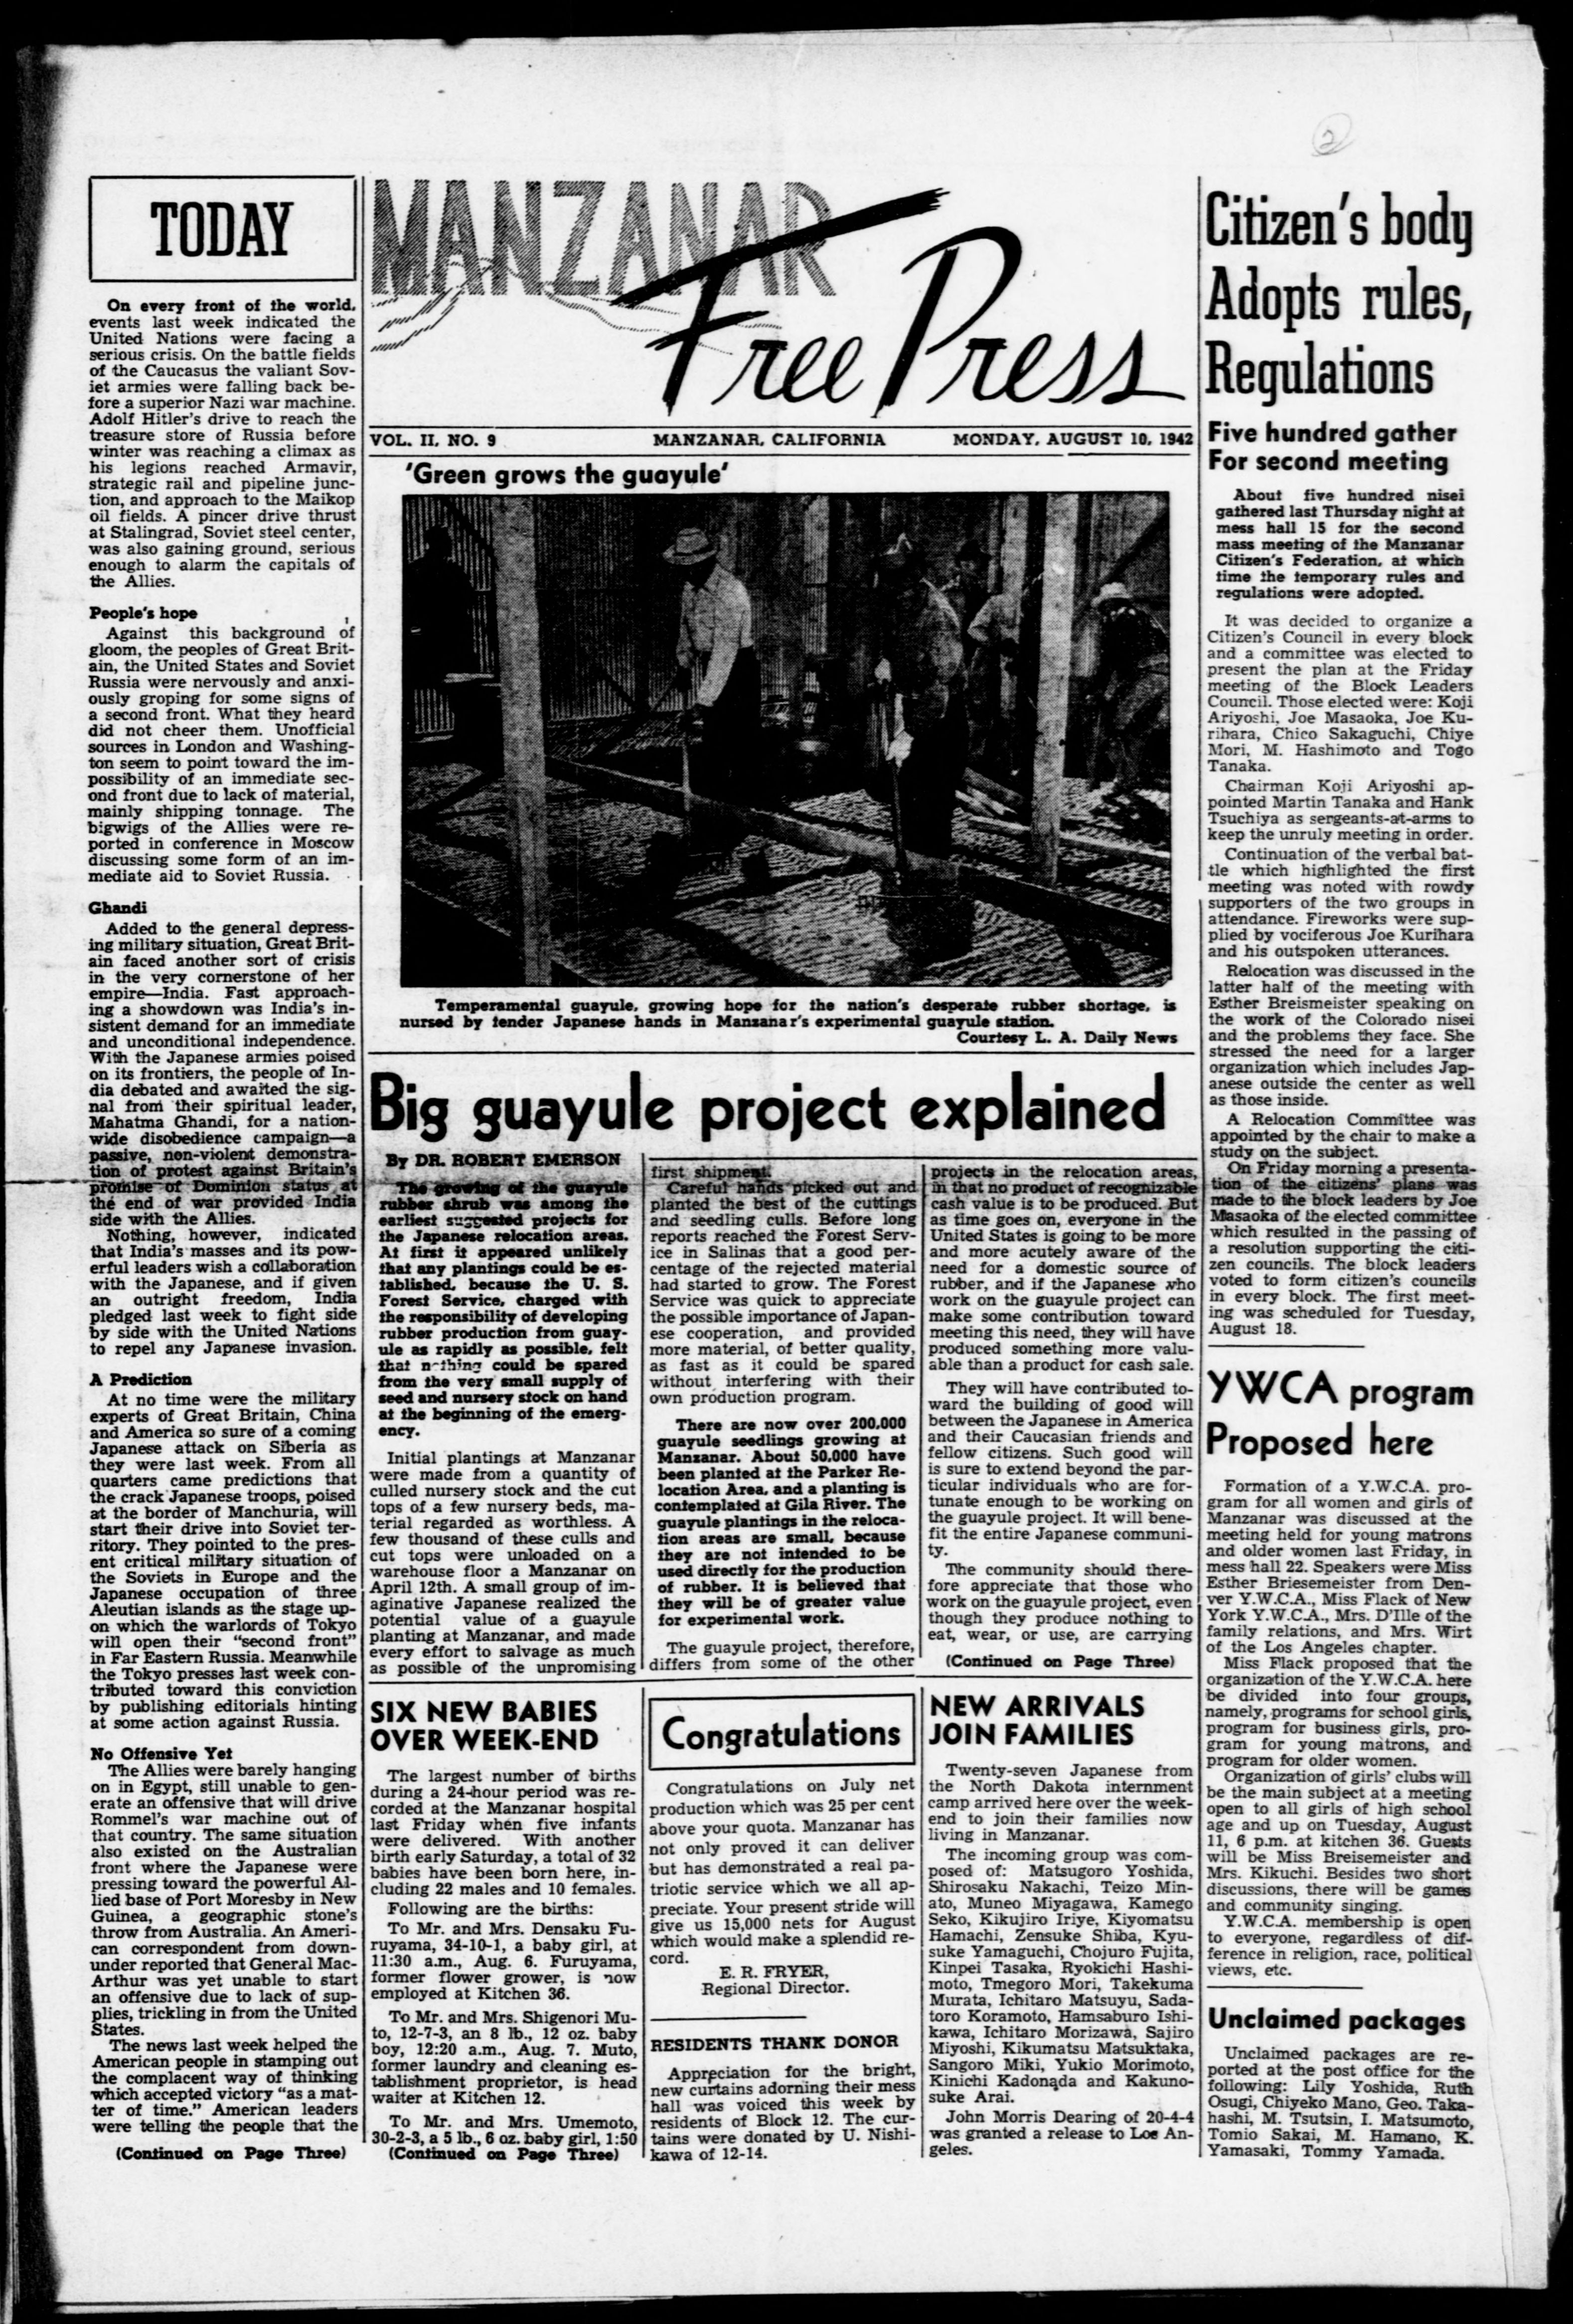

In [12]:
display(Image("http://tile.loc.gov/image-services/iiif/service:sgp:sgpbatches:batch_dlc_anacostia_ver01:data:sn84025948:0023728866A:1942081001:0202/full/full/0/default.jpg"))

# How do I get different sizes?
Let's say we want a smaller version of the image. We can make a request for different sizes by specifying the percent of the full image. Look for the change in the size portion of the URL and how we used "pct:5" in the example below. 

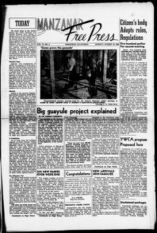

In [6]:
display(Image("http://tile.loc.gov/image-services/iiif/service:sgp:sgpbatches:batch_dlc_anacostia_ver01:data:sn84025948:0023728866A:1942081001:0202/full/pct:5/0/default.jpg"))

# How do I Mirror an image?
Success! We made a request and received different sized images. 
Now let's look at a simple way to use the request to manipulate the image. For fun, let's flip the image. Flipping is known as "mirroring" an image.
This time, we're going to focus on the rotation part of the URL. Remember, it is:
`{scheme}://{server}{/prefix}/{identifier}/{region}/{size}/{rotation}/{quality}.{format}`
To flip the image, you merely include the ! in front of the {rotation} part of the URL. Let's see what happens:

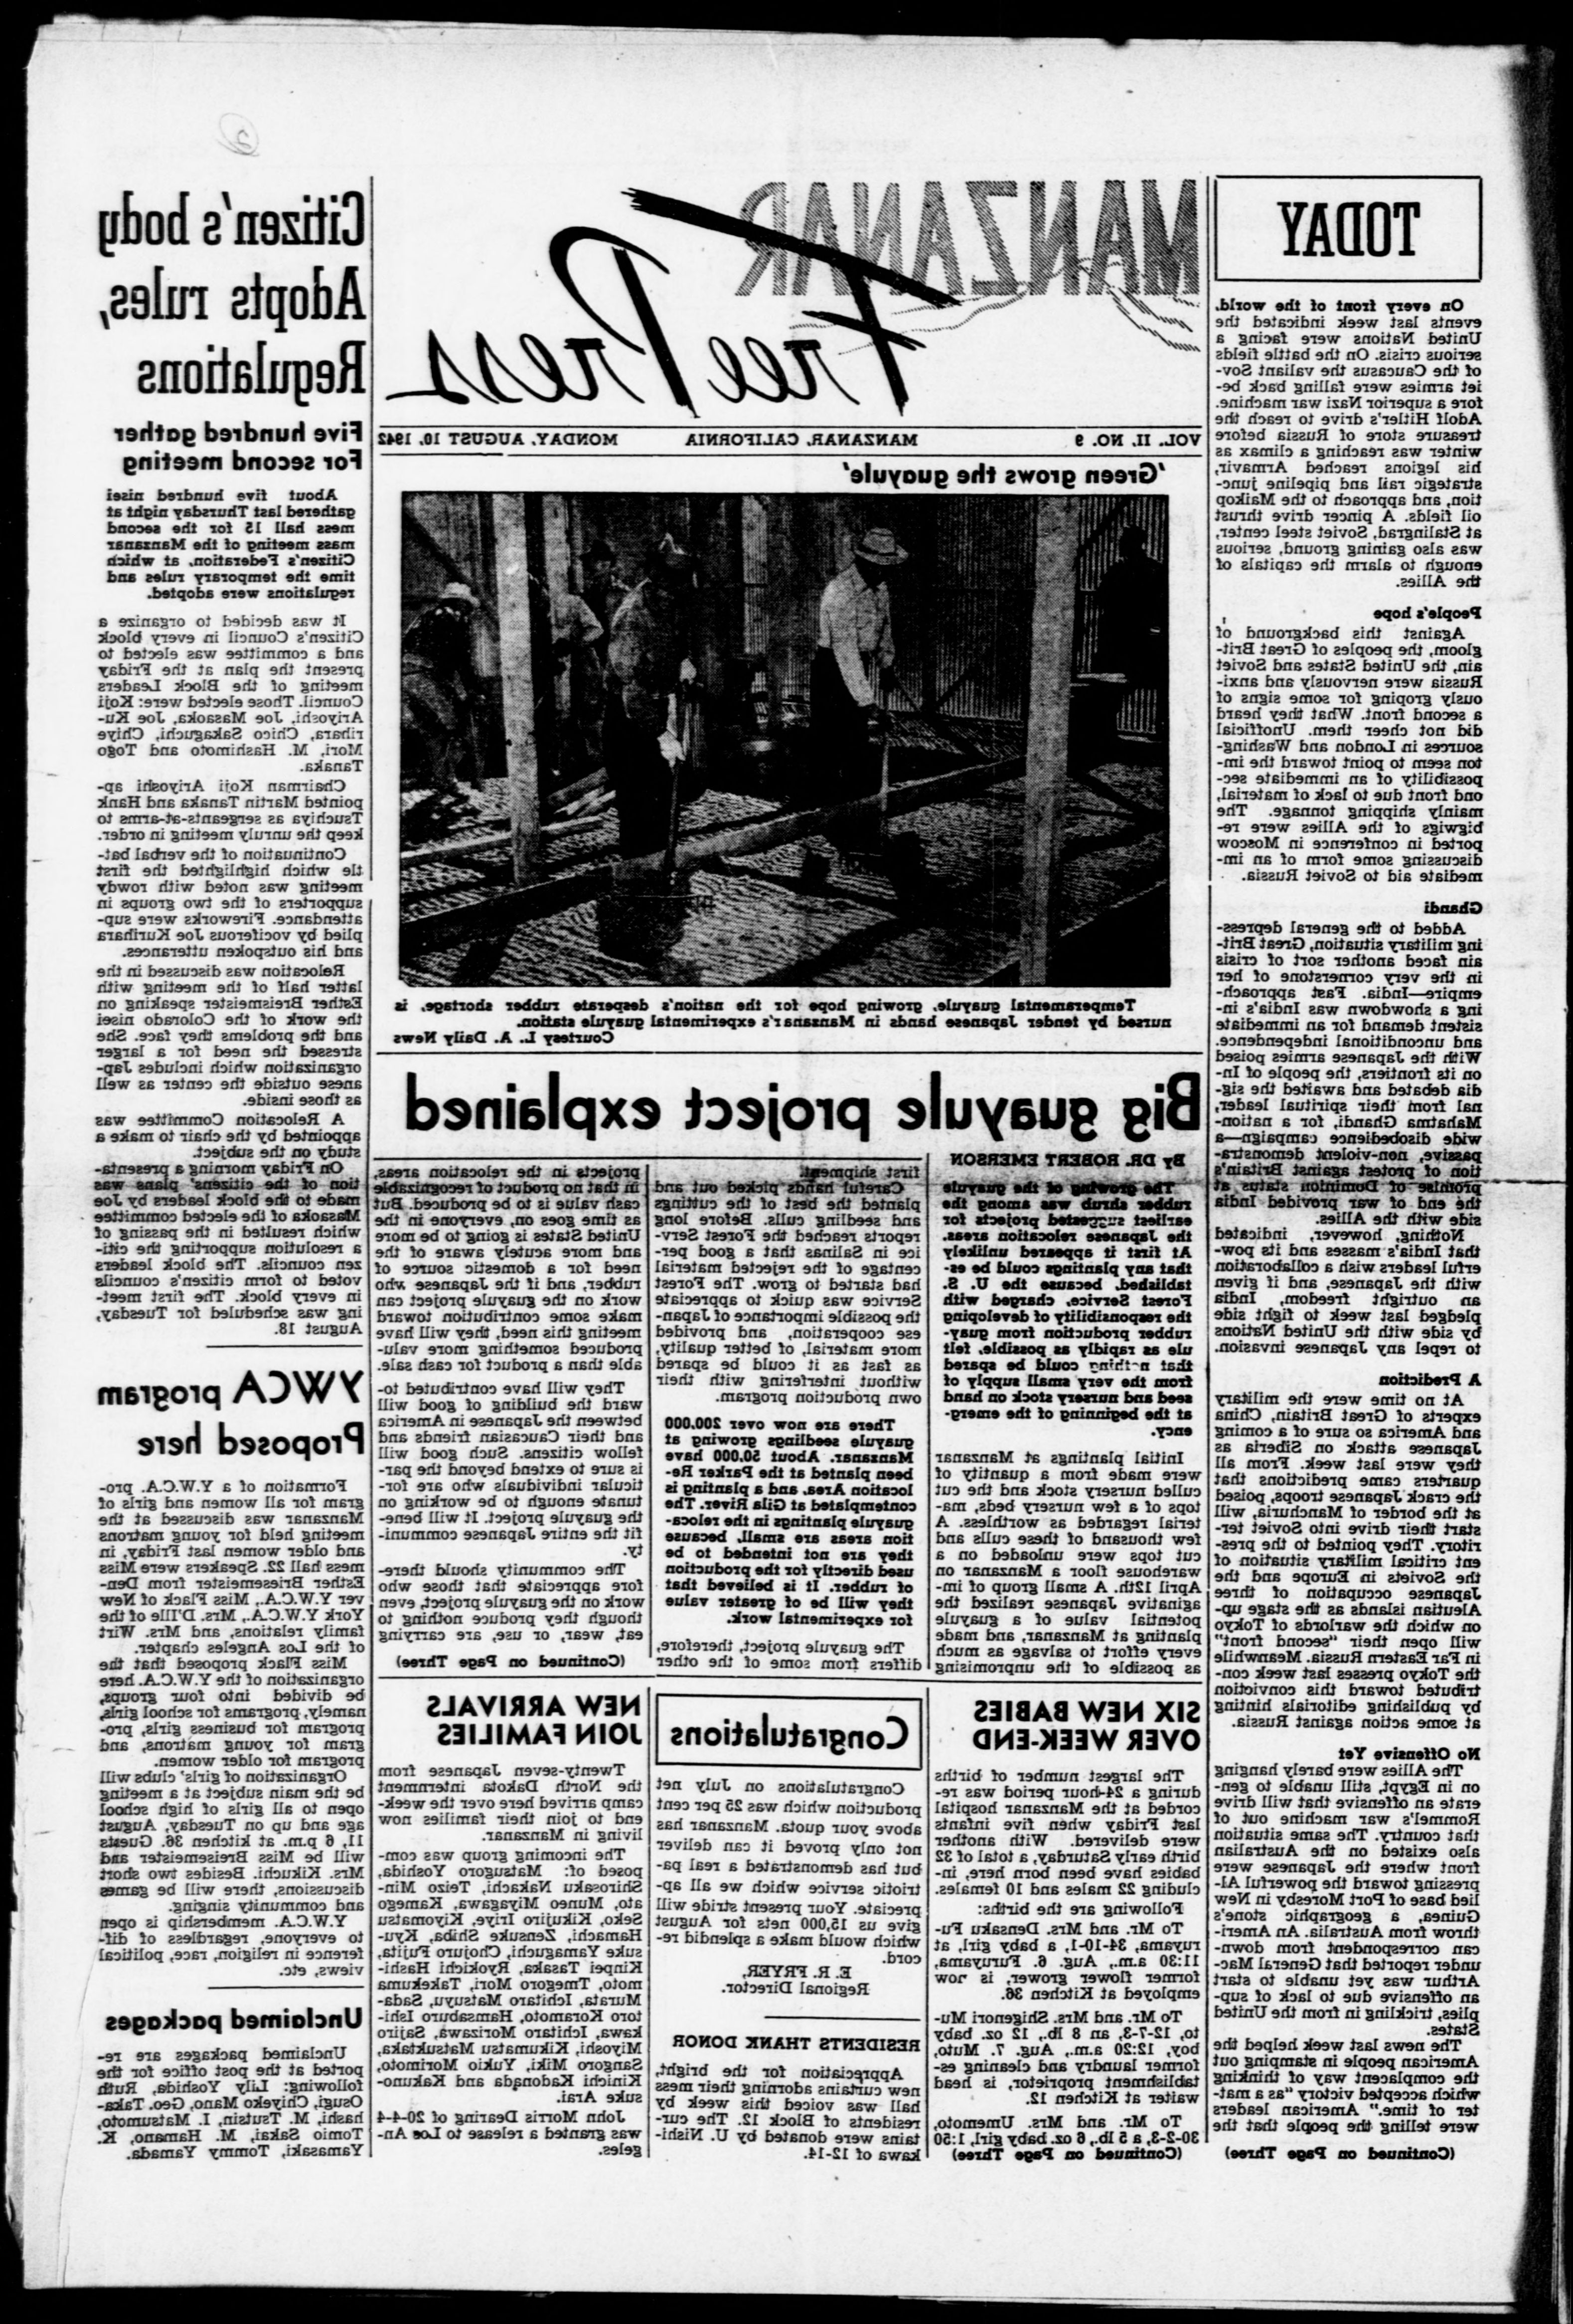

In [10]:
display(Image("http://tile.loc.gov/image-services/iiif/service:sgp:sgpbatches:batch_dlc_anacostia_ver01:data:sn84025948:0023728866A:1942081001:0202/full/full/!0/default.jpg"))

# How do I rotate a image?
What if we needed to rotate an image? Let's see if we can turn the image we've received on its side. To rotate an image, you'll specify the degrees to rotate in the {rotation} part of the URL. 
Do you see what we included in the URL when we got the full size image? We asked for "0" rotation - zero degrees and do not mirror the image. What do you think we'll include in our request if we want to rotate it on it's side (clockwise) 90 degrees? That's right: "90"
Here is an example where we rotate it 90 degrees:

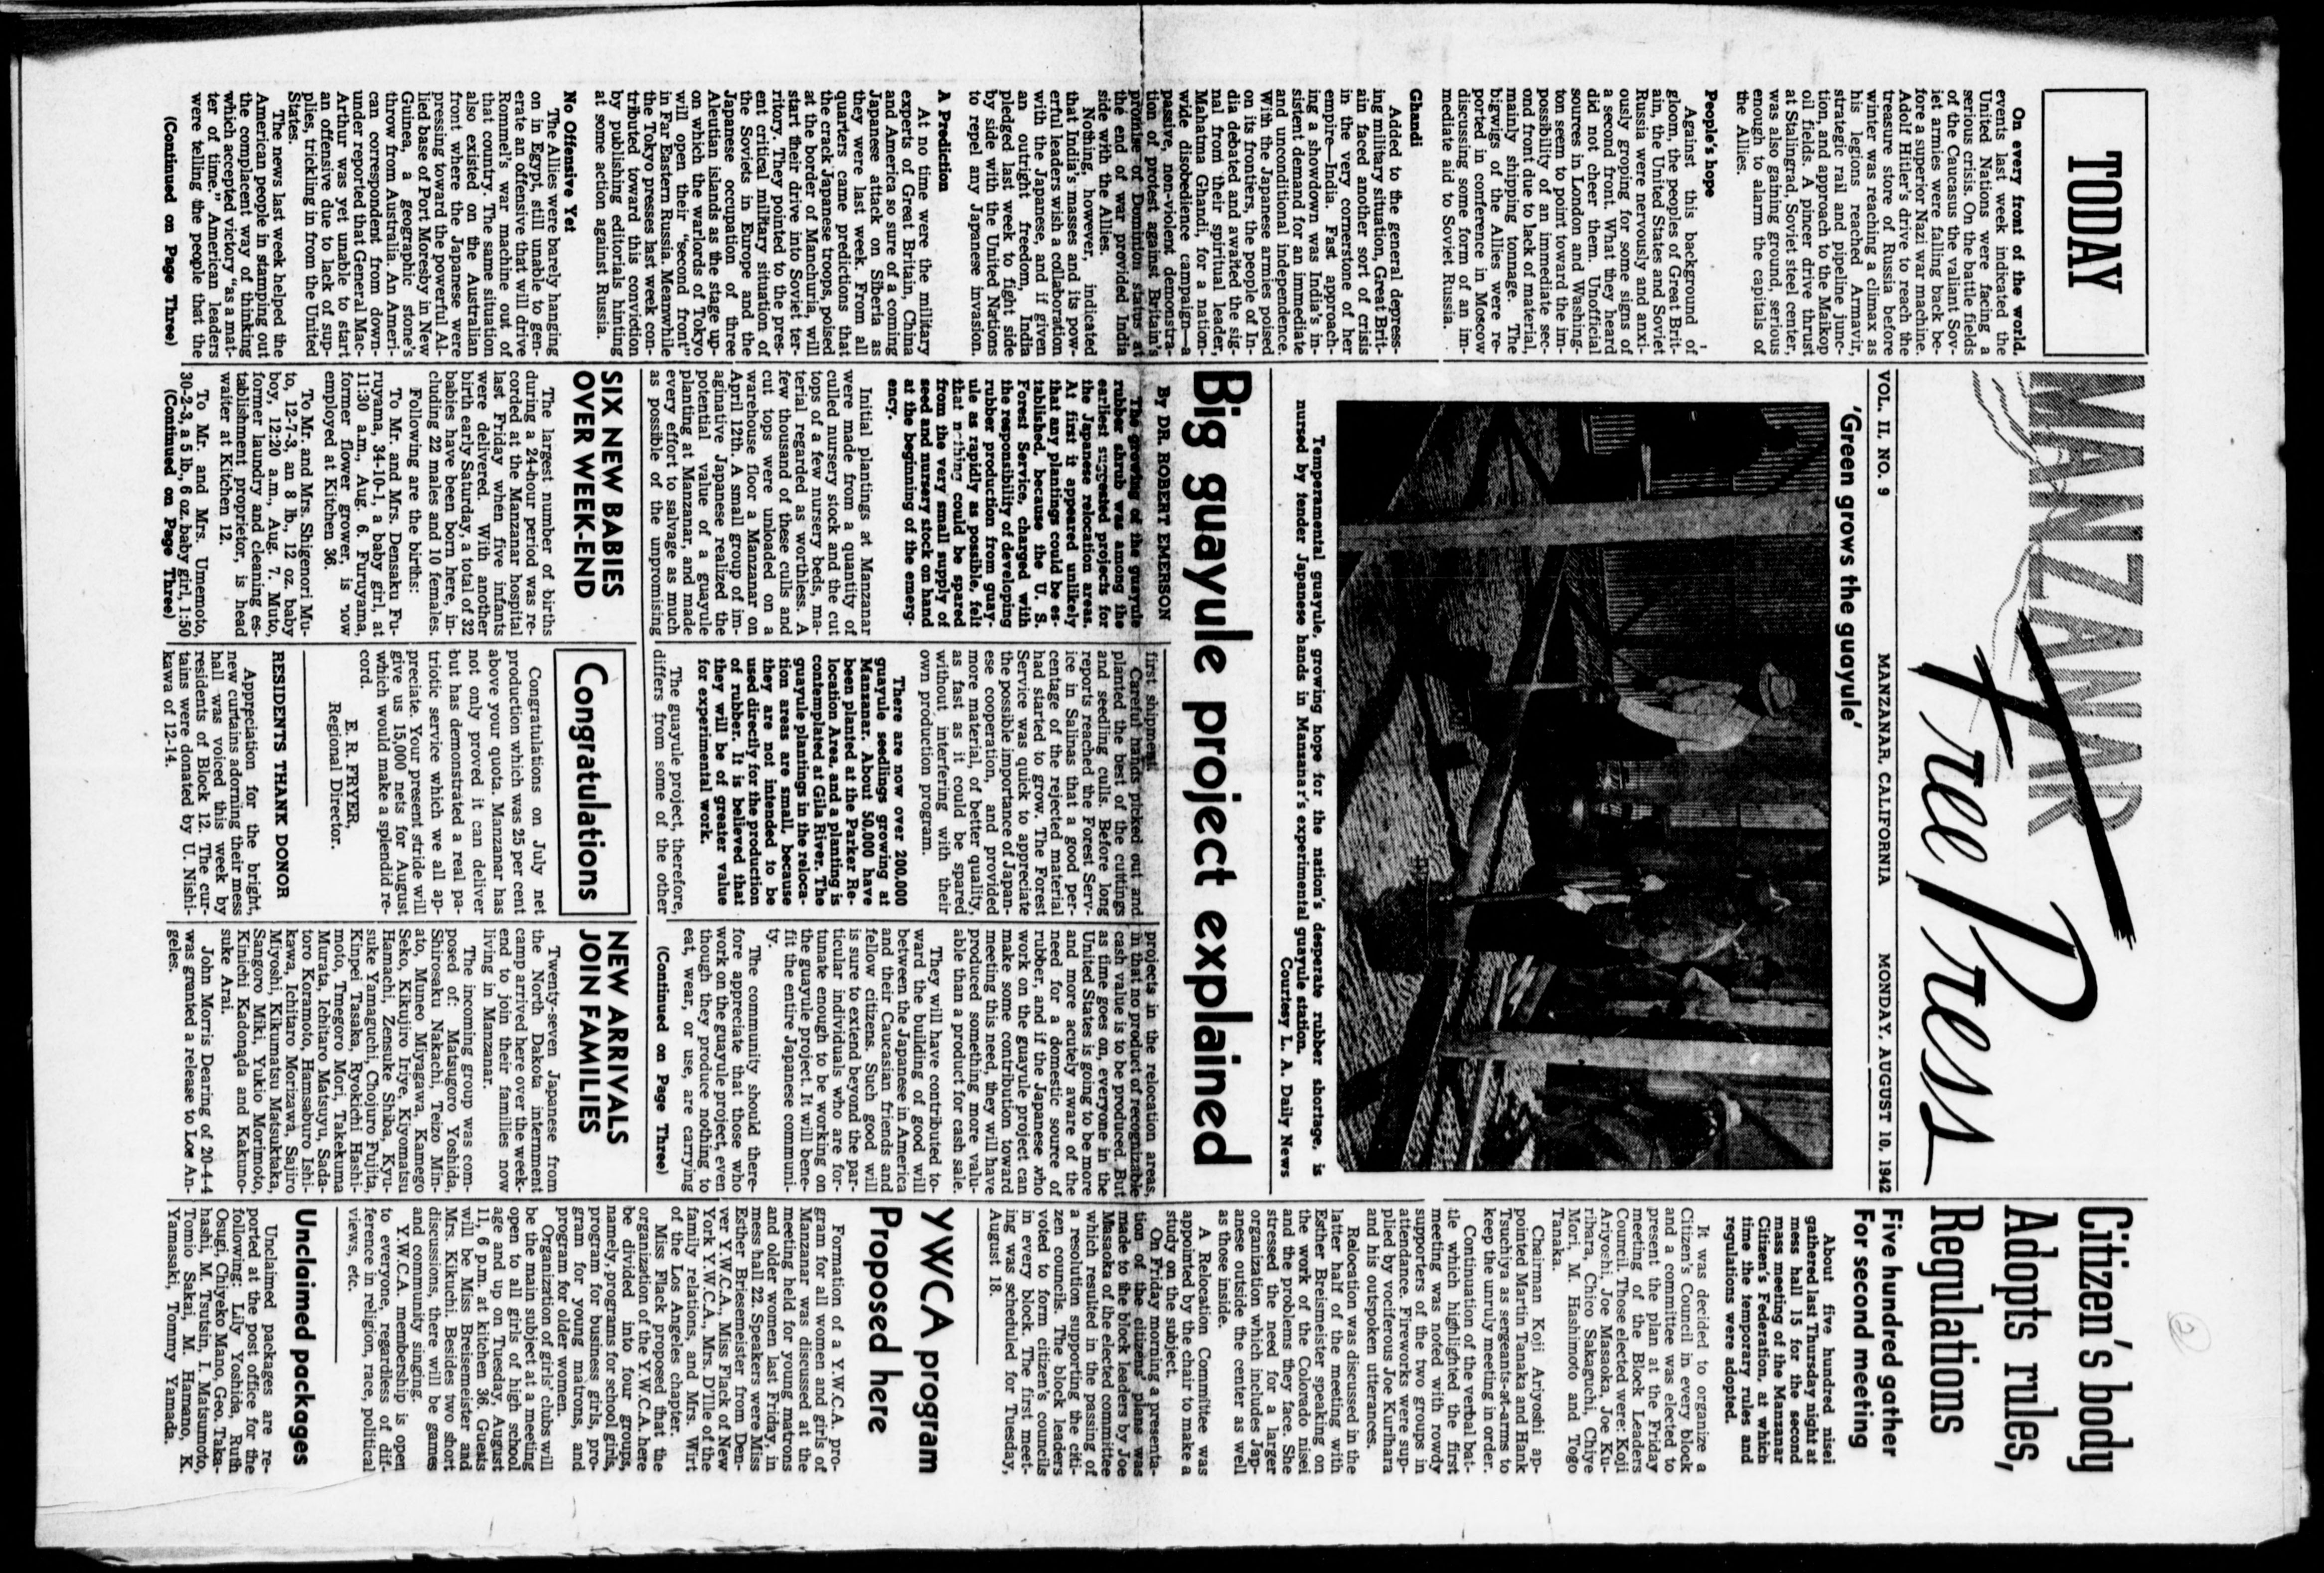

In [11]:
display(Image("http://tile.loc.gov/image-services/iiif/service:sgp:sgpbatches:batch_dlc_anacostia_ver01:data:sn84025948:0023728866A:1942081001:0202/full/full/90/default.jpg"))

# How do I select a region?
Let's consider a researcher's needs. Claudette is researching laborers in California in the early 1940s. Specifically she wants to explore the photographs in local and regional newspapers. She can make a call, another word for request, to get just the image in the page we've been manipulating. 
One way Claudette can select a region is by using a percent of the image with specific instructions about where to start the selection. She'll include this information in the region portion of the URL. Recall it is: 
`{scheme}://{server}{/prefix}/{identifier}/{region}/{size}/{rotation}/{quality}.{format}`

For example: she can ask for the selection to start 25 percent from the x-axis and 15 percent from the y-axis, taking 50 percent of the total width and 45 percent of the total height:

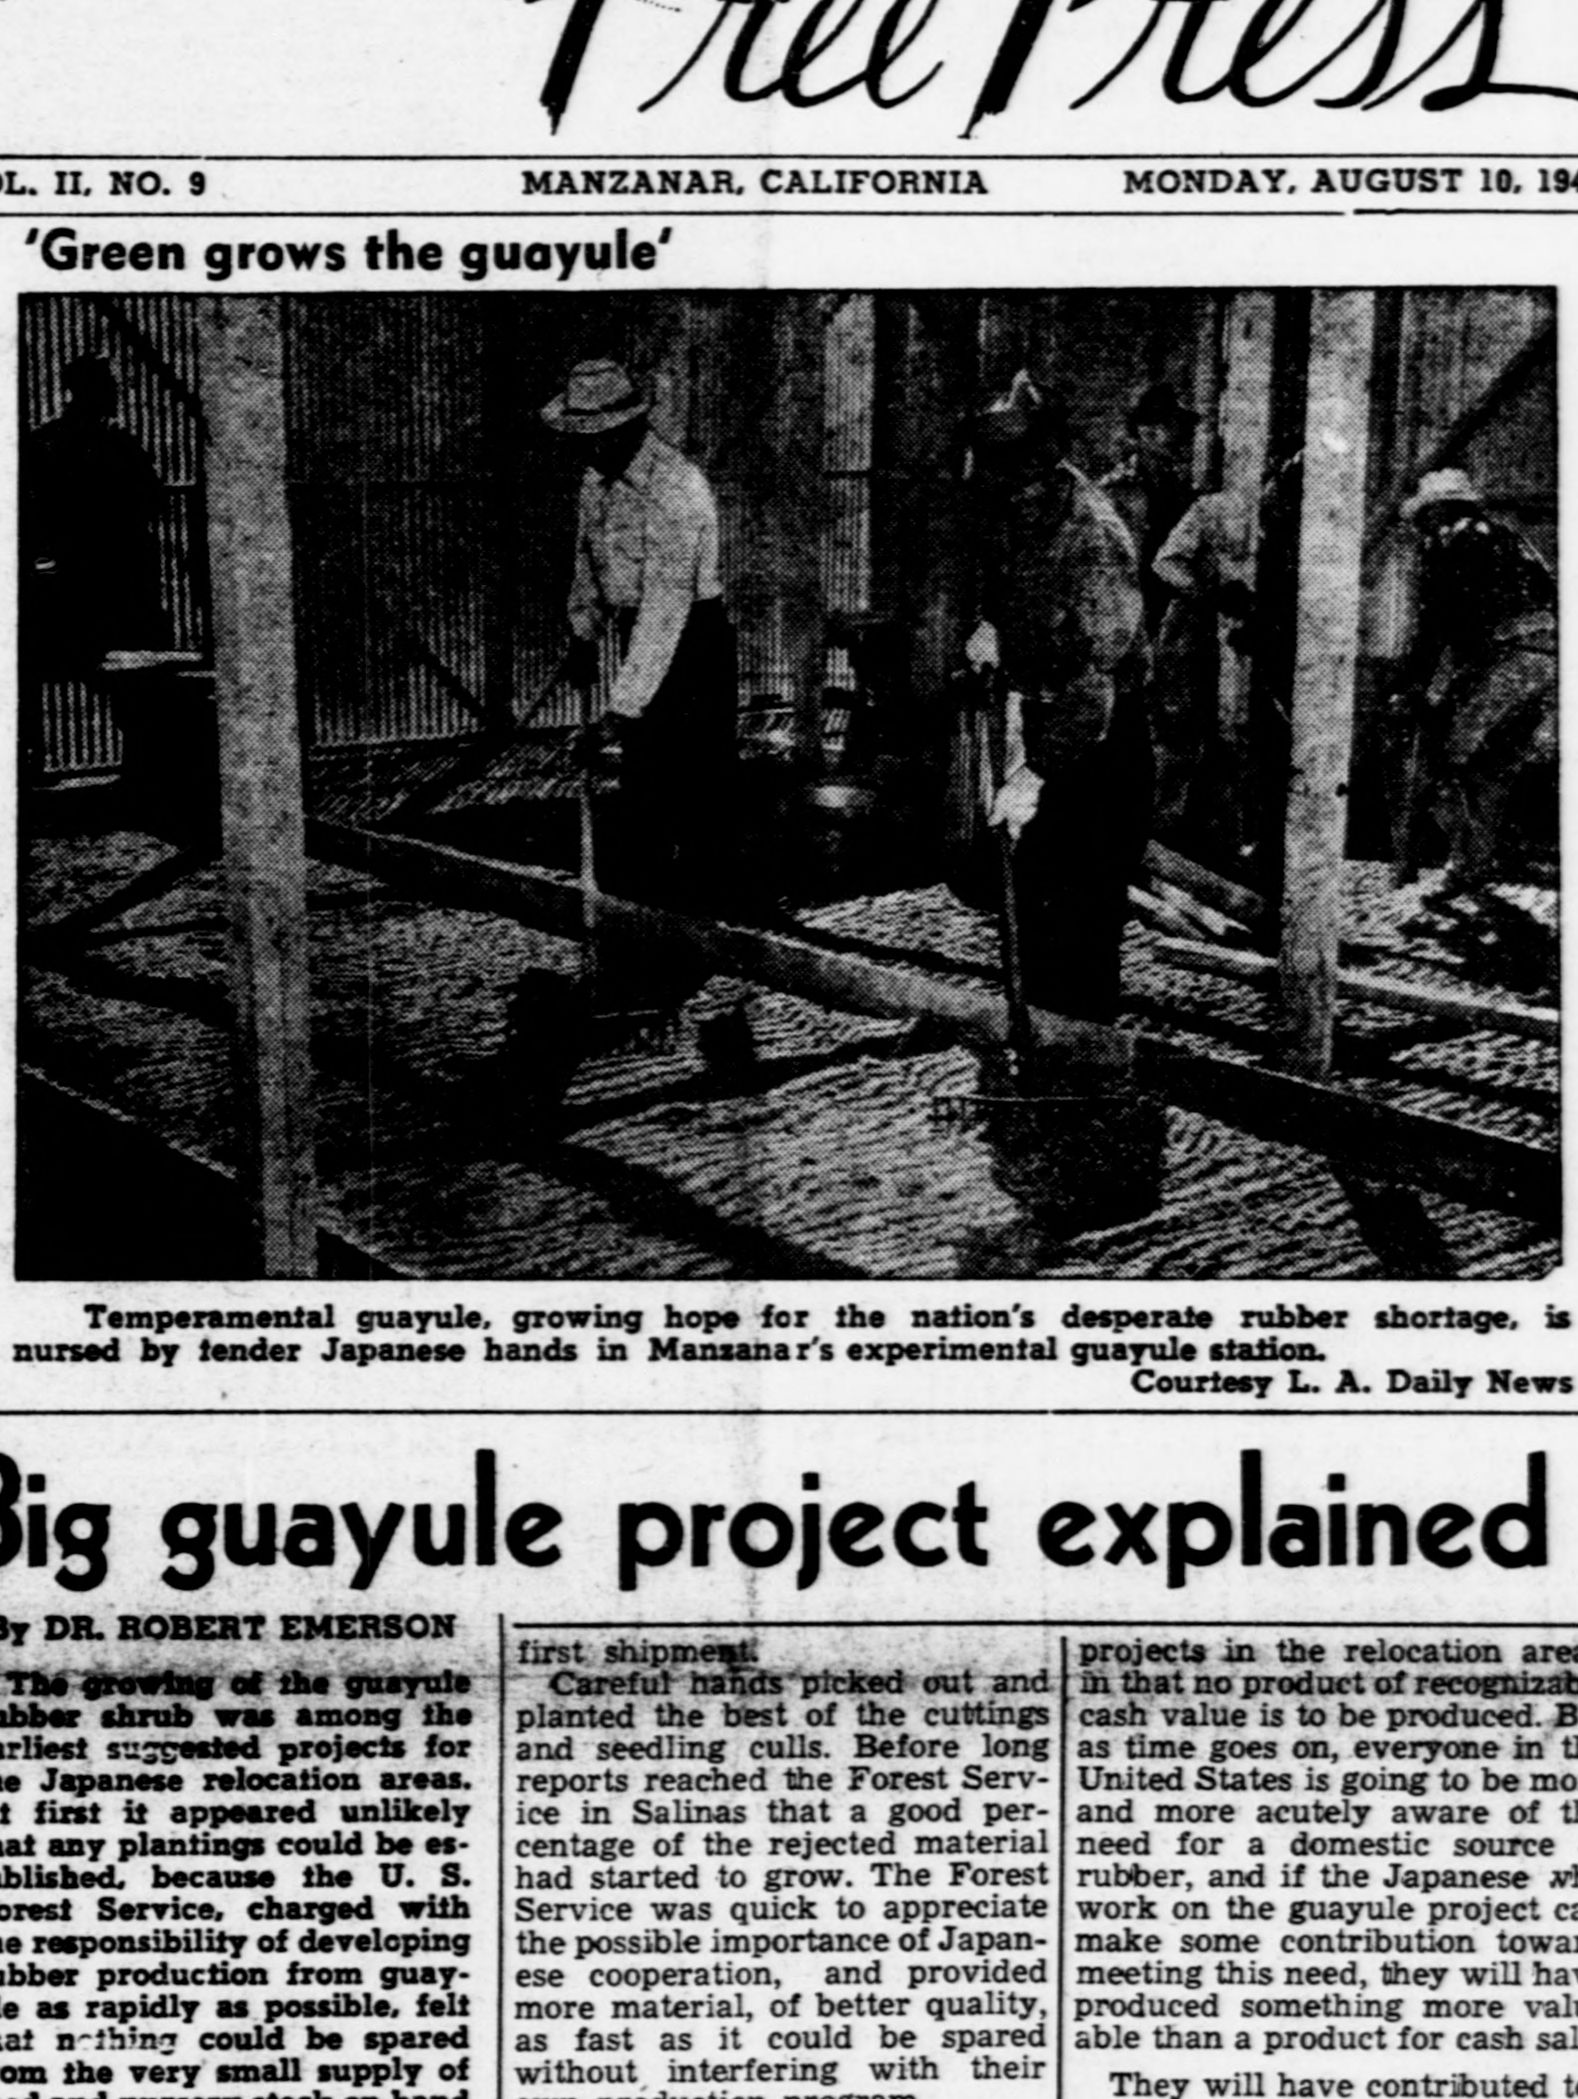

In [4]:
display(Image("http://tile.loc.gov/image-services/iiif/service:sgp:sgpbatches:batch_dlc_anacostia_ver01:data:sn84025948:0023728866A:1942081001:0202/pct:25,15,50,45/full/0/default.jpg"))

# Gotchas
* Images define the x-axis differently then you might expect. For example, 0 in the y-axis is the top of the image, not the bottom. And increasing the y-axis moves the starting point *down* the image, not up like you would normally expect.
* The IIIF specification allows for many neat actions, however not all images support all actions so be sure to check the info.json response to make sure your action is supported.